# Data collection


In [1]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng 
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score



In [3]:
####################### data
#"Growth temperatures for 21,498 microorganisms" (Engqvist, 2018)
ogt_data = pd.read_csv('temperature_data.csv')
#NCBI bacterial summary - note, this has been shortened to contain only complete genomes using grep
bacterial_genomes_data = pd.read_csv('bacterial_complete_genomes.csv', encoding='latin-1')
#NCBI Archaeal summary - shortened to only contain complete genomes using grep
archaeal_genomes_data = pd.read_csv('archaea_complete_genomes.csv', encoding='latin-1')

In [4]:
#investigate the datasets
ogt_data

,organism,domain,temperature,taxid,lineage_text,superkingdom,phylum,class,order,family,genus
0,abiotrophia_adiacens,Bacteria,37,46124,cellular organisms; Bacteria; Terrabacteria gr...,2,1239.0,91061.0,186826.0,186828.0,117563.0
1,abiotrophia_balaenopterae,Bacteria,37,137733,cellular organisms; Bacteria; Terrabacteria gr...,2,1239.0,91061.0,186826.0,186828.0,117563.0
2,abiotrophia_defectiva,Bacteria,37,46125,cellular organisms; Bacteria; Terrabacteria gr...,2,1239.0,91061.0,186826.0,186827.0,46123.0
3,abiotrophia_elegans,Bacteria,37,137732,cellular organisms; Bacteria; Terrabacteria gr...,2,1239.0,91061.0,186826.0,186828.0,117563.0
4,abortiporus_biennis,Eukaryota,26,137743,cellular organisms; Eukaryota; Opisthokonta; F...,2759,5204.0,155619.0,5303.0,83233.0,137742.0
...,...,...,...,...,...,...,...,...,...,...,...
21493,zymobacterium_oroticum,Bacteria,37,1544,cellular organisms; Bacteria; Terrabacteria gr...,2,1239.0,186801.0,186802.0,186803.0,2005359.0
21494,zymomonas_anaerobia,Bacteria,30,542,cellular organisms; Bacteria; Proteobacteria; ...,2,1224.0,28211.0,204457.0,41297.0,541.0
21495,zymomonas_mobilis,Bacteria,29,542,cellular organisms; Bacteria; Proteobacteria; ...,2,1224.0,28211.0,204457.0,41297.0,541.0
21496,zymophilus_paucivorans,Bacteria,30,86958,cellular organisms; Bacteria; Terrabacteria gr...,2,1239.0,909932.0,909929.0,1843491.0,84034.0


In [5]:
bacterial_genomes_data

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material,asm_not_live_date
0,GCA_900128725.1,PRJEB15400,SAMEA4556317,NaN,na,9,9,Buchnera aphidicola,strain=BCifornacula,2912,...,Full,25/11/2016,BCifornacula_v1.0,Centre de Biologie pour la Gestion des Populat...,GCF_900128725.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/9...,NaN,NaN,na
1,GCA_002157365.2,PRJNA381311,SAMN06673971,NaN,na,24,24,Shewanella putrefaciens,strain=SA70,NaN,...,Full,14/07/2021,ASM215736v2,Washington University,GCF_002157365.2,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
2,GCA_003044255.1,PRJNA422021,SAMN08180388,NaN,na,24,24,Shewanella putrefaciens,strain=WS13,NaN,...,Full,08/04/2018,ASM304425v1,Shanghai Engineering Research Center of Aquati...,GCF_003044255.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,many frameshifted proteins,NaN,na
3,GCA_009730575.1,PRJNA231221,SAMN11056396,NaN,na,24,24,Shewanella putrefaciens,strain=FDAARGOS_681,NaN,...,Full,05/12/2019,ASM973057v1,US Food and Drug Administration,GCF_009730575.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
4,GCA_016406305.1,PRJNA686146,SAMN17120582,NaN,na,24,24,Shewanella putrefaciens,strain=CGMCC-1.6515,NaN,...,Full,27/12/2020,ASM1640630v1,Ocean University of China,GCF_016406305.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39227,GCA_029760895.1,PRJNA941463,SAMN33607703,NaN,na,3039801,3039801,Ancylobacter sp. WKF20,strain=WKF20,NaN,...,Full,15/04/2023,ASM2976089v1,Wonkwang University,GCF_029760895.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
39228,GCA_029854195.1,PRJNA953190,SAMN34109428,NaN,na,3039851,3039851,Amylibacter sp. IMCC11727,strain=IMCC11727,NaN,...,Full,23/04/2023,ASM2985419v1,Inha University,na,na,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
39229,GCA_029814825.1,PRJNA954161,SAMN34136072,NaN,na,3040348,3040348,Aequorivita sp. Ant34-E75,strain=Ant34-E75,NaN,...,Full,18/04/2023,ASM2981482v1,First Institute of Oceanography,GCF_029814825.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
39230,GCA_029719485.1,PRJNA945337,SAMN33778680,NaN,na,3040511,3040511,Kiritimatiellota bacterium B12222,strain=B12222,NaN,...,Full,13/04/2023,ASM2971948v1,Marine College,na,na,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,genus undefined,NaN,na


In [6]:
archaeal_genomes_data

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material,asm_not_live_date
0,GCA_000762265.1,PRJNA49593,SAMN03085433,NaN,na,2162,2162,Methanobacterium formicicum,strain=BRM9,NaN,...,Full,02/10/2014,ASM76226v1,PGgRc,GCF_000762265.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
1,GCA_000953115.1,PRJEB7090,SAMEA2724982,NaN,na,2162,2162,Methanobacterium formicicum,NaN,NaN,...,Full,10/09/2014,DSM1535,CEBITEC,GCF_000953115.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,contaminated,NaN,na
2,GCA_001458655.1,PRJEB7298,SAMEA2779801,NaN,representative genome,2162,2162,Methanobacterium formicicum,NaN,Mb9,...,Full,16/11/2015,Mb9,CEBITEC,GCF_001458655.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
3,GCA_002813085.1,PRJNA350240,SAMN05935551,NaN,na,2173,2173,Methanobrevibacter smithii,strain=KB11,NaN,...,Full,06/12/2017,ASM281308v1,KRIBB,GCF_002813085.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
4,GCA_022846155.1,PRJDB11902,SAMD00389909,NaN,na,2173,2173,Methanobrevibacter smithii,strain=CE91-St67,NaN,...,Full,04/02/2022,ASM2284615v1,"Laboratory for Microbiome Sciences, Center for...",GCF_022846155.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,GCA_029338355.1,PRJNA943336,SAMN33716776,NaN,na,3034023,3034023,Halosegnis sp. DT85,strain=DT85,NaN,...,Full,22/03/2023,ASM2933835v1,Jiangsu University,GCF_029338355.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
586,GCA_029338375.1,PRJNA943339,SAMN33716851,NaN,na,3034024,3034024,Halorussus sp. DT80,strain=DT80,NaN,...,Full,22/03/2023,ASM2933837v1,Jiangsu University,GCF_029338375.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
587,GCA_029338395.1,PRJNA943350,SAMN33716999,NaN,na,3034025,3034025,Halorussus sp. DT72,strain=DT72,NaN,...,Full,22/03/2023,ASM2933839v1,Jiangsu University,GCF_029338395.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na
588,GCA_029338515.1,PRJNA943353,SAMN33717057,NaN,na,3034026,3034026,Haloglomus sp. DT116,strain=DT116,NaN,...,Full,22/03/2023,ASM2933851v1,Jiangsu University,GCF_029338515.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na


- Use marry_find.py to create our datasets.
---------

- format in command line:
1. python marry_find.py archaea_complete_genomes.csv
2. python marry_find.py bacteria_complete_genomes.csv

---------
- Make sure temperature_data.csv and the NCBI summary is in the same location as the python program.
- Marry_find will create a csv file containing a dataframe of genomes with known OGTs. Known OGTs are from ogt_data, genomes are from either bacterial_genomes_data or archaeal_genomes_data.

In [7]:
##investigate the resulting datasets
bact_ogt_with_genomes = pd.read_csv('bact_dataset_with_ogt_and_genomes.csv')
arch_ogt_with_genomes = pd.read_csv('archaea_dataset_with_ogt_and_genomes.csv')

In [8]:
bact_ogt_with_genomes

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material,asm_not_live_date,OGT
0,GCA_019931005.1,PRJNA231221,SAMN20888894,NaN,representative genome,46124,46124,Granulicatella adiacens,strain=FDAARGOS_1477,NaN,...,12/09/2021,ASM1993100v1,US Food and Drug Administration,GCF_019931005.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,37
1,GCA_025642215.1,PRJNA883546,SAMN30968860,NaN,na,46124,46124,Granulicatella adiacens,strain=KHUD_009,NaN,...,11/10/2022,ASM2564221v1,Kyung Hee University,GCF_025642215.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,37
2,GCA_025150565.1,PRJNA746600,SAMN20222693,NaN,na,638301,46124,Granulicatella adiacens ATCC 49175,strain=ATCC 49175,NaN,...,12/09/2022,ASM2515056v1,Stanford University,GCF_025150565.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,37
3,GCA_013267415.1,PRJNA231221,SAMN11056500,NaN,representative genome,46125,46125,Abiotrophia defectiva,strain=FDAARGOS_785,NaN,...,04/06/2020,ASM1326741v1,US Food and Drug Administration,GCF_013267415.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,37
4,GCA_020735385.1,PRJNA231221,SAMN22091656,NaN,na,137732,137732,Granulicatella elegans,strain=FDAARGOS_1559,NaN,...,03/11/2021,ASM2073538v1,US Food and Drug Administration,GCF_020735385.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31401,GCA_026435835.1,PRJNA778725,SAMN28878999,NaN,na,29486,29486,Yersinia ruckeri,strain=NVI-10571,NaN,...,28/11/2022,ASM2643583v1,Norwegian Veterinary Institute,GCF_026435835.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,26
31402,GCA_000582515.1,PRJNA238010,SAMN02640350,NaN,representative genome,367190,367190,Yersinia similis,strain=228,NaN,...,26/02/2014,ASM58251v1,Friedrich-Loeffler-Institut,GCF_000582515.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,26
31403,GCA_002407485.1,PRJNA294591,SAMN04027252,NaN,representative genome,347534,347534,Zobellella denitrificans,strain=F13-1,NaN,...,02/10/2017,ASM240748v1,The Third Institute of State Oceanic Administr...,GCF_002407485.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,26
31404,GCA_000973105.1,PRJEB8976,SAMEA3315864,NaN,representative genome,63186,63186,Zobellia galactanivorans,strain=DsiJT,NaN,...,10/07/2011,ASM97310v1,Genoscope CEA,GCF_000973105.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,26


In [9]:
arch_ogt_with_genomes

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material,asm_not_live_date,OGT,predicted_OGT
0,GCA_009729015.1,PRJNA488459,SAMN09933089,NaN,representative genome,2283,2283,Acidianus ambivalens,strain=LEI 10,NaN,...,ASM972901v1,North Carolina State University,GCF_009729015.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,80,76.37
1,GCA_003201835.2,PRJNA463410,SAMN09071529,NaN,representative genome,41673,41673,Acidianus brierleyi,strain=DSM 1651,NaN,...,ASM320183v2,North Carolina State University,GCF_003201835.2,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,72,68.73
2,GCA_003201765.2,PRJNA463410,SAMN09071530,NaN,representative genome,619593,312539,Acidianus sulfidivorans JP7,strain=JP7,NaN,...,ASM320176v2,North Carolina State University,GCF_003201765.2,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,70,67.92
3,GCA_000144915.1,PRJNA39927,SAMN02603091,NaN,representative genome,666510,242703,Acidilobus saccharovorans 345-15,strain=345-15,NaN,...,ASM14491v1,Centre Bioengineering RAS,GCF_000144915.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,80,74.71
4,GCA_000025665.1,PRJNA38403,SAMN02598523,NaN,na,439481,379547,Aciduliprofundum boonei T469,strain=T469,NaN,...,ASM2566v1,US DOE Joint Genome Institute,GCF_000025665.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,70,74.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,GCA_000193375.1,PRJNA64455,SAMN02603093,NaN,representative genome,999630,184117,Thermoproteus uzoniensis 768-20,strain=768-20,NaN,...,ASM19337v1,Centre Bioengineering RAS,GCF_000193375.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,85,87.73
263,GCA_014962245.1,PRJNA668939,SAMN16428067,NaN,na,54254,54254,Thermosphaera aggregans,strain=3507,NaN,...,ASM1496224v1,"National Research Center ""Kurchatov Institute""",GCF_014962245.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,85,92.40
264,GCA_000092185.1,PRJNA36571,SAMN02598509,NaN,representative genome,633148,54254,Thermosphaera aggregans DSM 11486,strain=DSM 11486,NaN,...,ASM9218v1,US DOE Joint Genome Institute (JGI-PGF),GCF_000092185.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,85,94.00
265,GCA_000148385.1,PRJNA32589,SAMN00017002,NaN,representative genome,572478,164451,Vulcanisaeta distributa DSM 14429,strain=DSM 14429,NaN,...,ASM14838v1,US DOE Joint Genome Institute (JGI-PGF),GCF_000148385.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,90,96.22


Combine the Bacterial and Archaea datasets together to create the Prokaryote dataset

In [10]:
#state dataframes
dataframes = [bact_ogt_with_genomes, arch_ogt_with_genomes]
# combine them
prokaryote_dataset = pd.concat(dataframes)

In [11]:
# make sure the resulting dataset looks right
prokaryote_dataset

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material,asm_not_live_date,OGT,predicted_OGT
0,GCA_019931005.1,PRJNA231221,SAMN20888894,NaN,representative genome,46124,46124,Granulicatella adiacens,strain=FDAARGOS_1477,NaN,...,ASM1993100v1,US Food and Drug Administration,GCF_019931005.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,37,NaN
1,GCA_025642215.1,PRJNA883546,SAMN30968860,NaN,na,46124,46124,Granulicatella adiacens,strain=KHUD_009,NaN,...,ASM2564221v1,Kyung Hee University,GCF_025642215.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,37,NaN
2,GCA_025150565.1,PRJNA746600,SAMN20222693,NaN,na,638301,46124,Granulicatella adiacens ATCC 49175,strain=ATCC 49175,NaN,...,ASM2515056v1,Stanford University,GCF_025150565.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,37,NaN
3,GCA_013267415.1,PRJNA231221,SAMN11056500,NaN,representative genome,46125,46125,Abiotrophia defectiva,strain=FDAARGOS_785,NaN,...,ASM1326741v1,US Food and Drug Administration,GCF_013267415.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,37,NaN
4,GCA_020735385.1,PRJNA231221,SAMN22091656,NaN,na,137732,137732,Granulicatella elegans,strain=FDAARGOS_1559,NaN,...,ASM2073538v1,US Food and Drug Administration,GCF_020735385.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,GCA_000193375.1,PRJNA64455,SAMN02603093,NaN,representative genome,999630,184117,Thermoproteus uzoniensis 768-20,strain=768-20,NaN,...,ASM19337v1,Centre Bioengineering RAS,GCF_000193375.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,85,87.73
263,GCA_014962245.1,PRJNA668939,SAMN16428067,NaN,na,54254,54254,Thermosphaera aggregans,strain=3507,NaN,...,ASM1496224v1,"National Research Center ""Kurchatov Institute""",GCF_014962245.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,NaN,na,85,92.40
264,GCA_000092185.1,PRJNA36571,SAMN02598509,NaN,representative genome,633148,54254,Thermosphaera aggregans DSM 11486,strain=DSM 11486,NaN,...,ASM9218v1,US DOE Joint Genome Institute (JGI-PGF),GCF_000092185.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,85,94.00
265,GCA_000148385.1,PRJNA32589,SAMN00017002,NaN,representative genome,572478,164451,Vulcanisaeta distributa DSM 14429,strain=DSM 14429,NaN,...,ASM14838v1,US DOE Joint Genome Institute (JGI-PGF),GCF_000148385.1,identical,https://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/0...,NaN,assembly from type material,na,90,96.22


### investigate the OGT distributions of the datasets

Bacteria


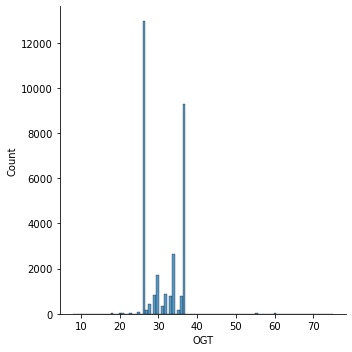

In [12]:
#give a graph of OGT distibutions
sns.displot(data = bact_ogt_with_genomes, x = "OGT")

In [13]:
#Give the exact numbers of each OGT
bact_ogt_with_genomes["OGT"].value_counts()

26    12961
37     9269
34     2656
30     1703
32      893
29      841
33      779
36      776
28      424
31      346
35      183
27      174
25       95
21       40
23       39
55       37
18       24
20       20
60       18
45       13
70       12
50       11
65       10
59        8
10        8
22        7
42        6
57        5
58        5
15        4
46        4
54        4
56        3
24        3
75        3
43        2
16        2
38        2
62        1
49        1
9         1
40        1
63        1
8         1
47        1
17        1
68        1
74        1
69        1
41        1
53        1
11        1
14        1
73        1
Name: OGT, dtype: int64

Archaea

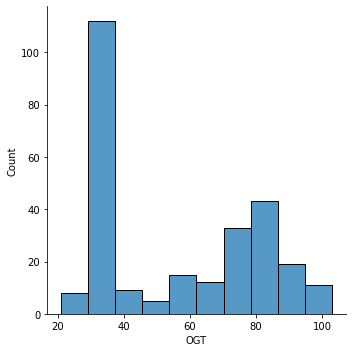

In [14]:
#give a graph of OGT distibutions
sns.displot(data = arch_ogt_with_genomes, x = "OGT")

In [15]:
#Give the exact numbers of each OGT
arch_ogt_with_genomes["OGT"].value_counts()

37     93
85     22
80     15
74     13
60     12
90     10
71     10
35      9
67      8
75      6
30      6
28      6
88      5
81      4
95      3
96      3
45      3
51      3
36      3
70      3
87      3
73      3
42      3
57      2
38      2
98      2
83      2
50      2
23      1
41      1
65      1
58      1
34      1
21      1
72      1
100     1
103     1
92      1
99      1
Name: OGT, dtype: int64

Clearly, the bacterial dataset has a overrepresentation of mesophiles, particularly ogts 37 and 26.
The archaea dataset has a overrepresentation of OGTs of 37 as well.
The datasets shall be cut down to be more representative, and avoid skew.
The representative datasets shall be combined to create the repesentative Prokaryotic dataset.

Lets start with bacteria and make each OGT have a max of 100 genomes


In [16]:
def representative(dataset, maximum):
    '''
    Takes a dataset and a maximum number, and makes a dataset with all OGT values have a maximum of the maximum number.
    
    Arguments:
        dataset(dataframe):The dataset you wish to cut down
        maximum(intiger): the maximum number of genomes per OGT
        
    Returns:
        output_dataset(dataframe): a dataframe with a maximum number of genomes per OGT
    '''
    # get amount of genomes per OGT
    old_ogt_count = dataset["OGT"].value_counts()
    #set up list
    ogt_over_max = []
    #find out which OGTs are over the maximum
    for item, value in old_ogt_count.iteritems():
        if value > maximum:
            ogt_over_max.append(item)
    # set up new dataset
    output_dataset = dataset
    # remove values with ogts over max
    for item in ogt_over_max:
        output_dataset = output_dataset[output_dataset['OGT'] != item]
    # take max of genomes for each ogt and append to output dataset
    for item in ogt_over_max:
        temp_dataframe = dataset[dataset["OGT"] == item]
        one_hun_max_of_ogt = temp_dataframe.sample(n=maximum)
        #state dataframes
        dataframes = [output_dataset, one_hun_max_of_ogt]
        # combine them
        output_dataset = pd.concat(dataframes)
    return(output_dataset)
        
    

In [17]:
# cut down bacteria
representative_bacteria = representative(bact_ogt_with_genomes, 100)
representative_bacteria["OGT"].value_counts()

27    100
36    100
37    100
34    100
30    100
32    100
29    100
33    100
28    100
31    100
35    100
26    100
25     95
21     40
23     39
55     37
18     24
20     20
60     18
45     13
70     12
50     11
65     10
10      8
59      8
22      7
42      6
57      5
58      5
15      4
54      4
46      4
75      3
24      3
56      3
43      2
16      2
38      2
11      1
47      1
14      1
53      1
63      1
40      1
8       1
9       1
49      1
17      1
68      1
74      1
73      1
69      1
41      1
62      1
Name: OGT, dtype: int64

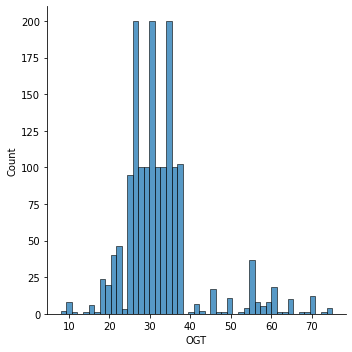

In [18]:
#investigate representative bacteria
sns.displot(data = representative_bacteria, x = "OGT")

That looks much better. Lets repeat for Archaea. It looks like archaea would be good with a maximum of 25 genomes per OGT.

In [19]:
# cut down Archaea
representative_archaea = representative(arch_ogt_with_genomes, 25)
representative_archaea["OGT"].value_counts()

37     25
85     22
80     15
74     13
60     12
90     10
71     10
35      9
67      8
75      6
30      6
28      6
88      5
81      4
42      3
96      3
51      3
70      3
95      3
73      3
45      3
36      3
87      3
50      2
38      2
98      2
83      2
57      2
103     1
100     1
34      1
58      1
65      1
23      1
41      1
72      1
92      1
99      1
21      1
Name: OGT, dtype: int64

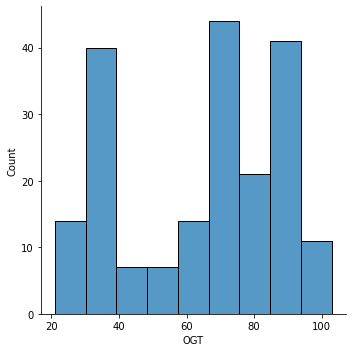

In [20]:
#investigate representative archaea
sns.displot(data = representative_archaea, x = "OGT")

Thats a much better distribution

Now we generate a 'representative' prokatyotic dataset

In [21]:
#state dataframes
dataframes = [representative_bacteria, representative_archaea]
# combine them
representative_prokaryotes = pd.concat(dataframes)

In [22]:
# save the datasets
representative_bacteria.to_csv('representative_bacteria.csv')
representative_archaea.to_csv('representative_archaea.csv')
representative_prokaryotes.to_csv('representative_prokaryotes.csv')

# Metagenomic Thermometer Analysis

put the datasets through the metagenommic thermometer program to generate predicted OGTS
- python original_metagenomic_thermometer.py dataset_name.csv 

if you wish, you can generate the amino acid frequencies at the same time to save time for later
- python amino_acid_and_met_thermometer.py dataset_name.csv 

Although I mentioned creating the representative datasets earlier, I would suggest saving this step until after you have generated predicted ogts for the 'full' datasets. Once these have been generated, THEN cut them down to representative size to save processing power and time.

### Bacteria

In [23]:
## create a function that plots the predicted ogt against ogt
def ogt_plot(data):
    #define data
    x = data["OGT"]
    y = data["predicted_OGT"]

    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    plt.scatter(x, y)
    #add line of best fit to plot
    plt.plot(x, a*x+b, "red")   
    ##add custom line to plot
    # this line will show a 'prefect' prediction
    plt.plot([0,100], [0,100], c="green")

In [25]:
#import datasets
representative_bacteria_predicted_ogt = pd.read_csv('representative_bacteria_predicted_ogt.csv')
full_bacteria_predicted_ogt = pd.read_csv('full_bacteria_predicted_ogt.csv')

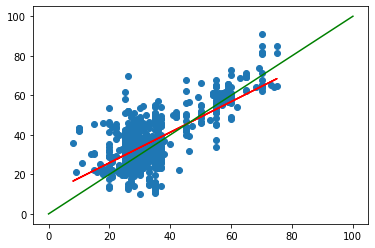

In [26]:
#look at the plot
ogt_plot(representative_bacteria_predicted_ogt)

In [27]:
# get the correlation between predicted and actual ogt
representative_bacteria_predicted_ogt.corr()["OGT"]

wgs_master            NaN
taxid            0.036918
species_taxid    0.019387
OGT              1.000000
predicted_OGT    0.687815
Name: OGT, dtype: float64

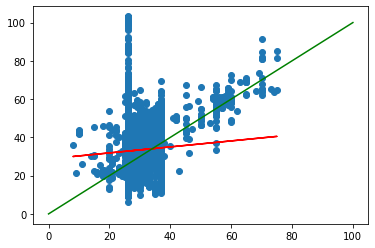

In [28]:
ogt_plot(full_bacteria_predicted_ogt)

In [29]:
full_bacteria_predicted_ogt.corr()["OGT"]

wgs_master            NaN
taxid           -0.089140
species_taxid   -0.081325
OGT              1.000000
predicted_OGT    0.105328
Name: OGT, dtype: float64

create a function to analyse the results


In [30]:
def predicted_ogt_analysis(data):
    '''
    Compares the results of the metagenomic thermometer to a model of a 'perfect' score
    
    Arguments:
        data(dataframe): the results of the metagenomic thermometer, with ogt and predicted ogt
    Returns:
        Nothing
    '''

    X = pd.DataFrame(data, columns=["predicted_OGT"])
    y= (data["OGT"])
    Z = pd.DataFrame(data, columns=["OGT"])


    regr = linear_model.LinearRegression()
    regr.fit(Z, y)


    meanAbErr = metrics.mean_absolute_error(X, y)
    meanSqErr = metrics.mean_squared_error(X, y)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(X, y))
    r2 = r2_score(y, X)
    print('r2 score for perfect model is', r2)
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)

In [31]:
predicted_ogt_analysis(representative_bacteria_predicted_ogt)

r2 score for perfect model is 0.17842593843617038
Mean Absolute Error: 6.356871049304678
Mean Square Error: 73.10086656131479
Root Mean Square Error: 8.549904476736263


In [32]:
predicted_ogt_analysis(full_bacteria_predicted_ogt)

r2 score for perfect model is -2.149452354799473
Mean Absolute Error: 6.877209450603946
Mean Square Error: 86.95841134214162
Root Mean Square Error: 9.3251494005266


Lets explore how well the representative predicted ogt correlates with ogt in its different thermal groups

In [33]:
def explore_therm_types(data):
    '''
    splits a dataset into psychrophiles, mesophiles, and thermophiles
    
    Arguments:
        data(dataframe): the dataframe to be split
    
    Returns:
        zero_to_20(dataframe):the psychrophile dataframe
        twenty_to_45(dataframe): the mesophile dataframe
        fourty_to_max(dataframe): the thermophile dataframe
    '''
    zero_to_20 = (data["OGT"]<=20)
    zero_to_20 = data[zero_to_20]

    twenty_to_45 = (data["OGT"]<=45)
    twenty_to_45 = data[twenty_to_45]
    twenty_to_45_2 = (twenty_to_45["OGT"]>20)
    twenty_to_45 = twenty_to_45[twenty_to_45_2]

    fourty_to_max = (data["OGT"]>45)
    fourty_to_max = data[fourty_to_max]
    
    return(zero_to_20, twenty_to_45, fourty_to_max)

In [34]:
# split the representitive bact into its diff thermal types
psy_bact,meso_bact, therm_bact = explore_therm_types(representative_bacteria_predicted_ogt)

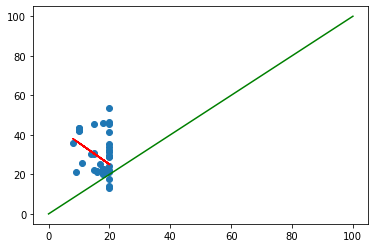

In [35]:
ogt_plot(psy_bact)

In [36]:
psy_bact.corr()["OGT"]

wgs_master            NaN
taxid            0.347944
species_taxid    0.254481
OGT              1.000000
predicted_OGT   -0.397164
Name: OGT, dtype: float64

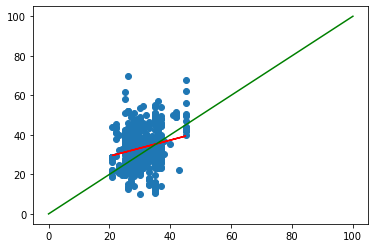

In [37]:
ogt_plot(meso_bact)

In [38]:
meso_bact.corr()["OGT"]

wgs_master            NaN
taxid           -0.115091
species_taxid   -0.130626
OGT              1.000000
predicted_OGT    0.245975
Name: OGT, dtype: float64

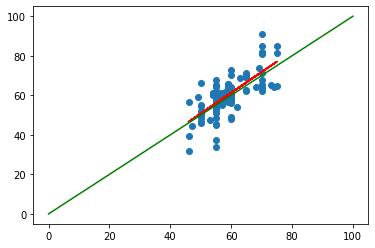

In [39]:
ogt_plot(therm_bact)

In [40]:
therm_bact.corr()["OGT"]

wgs_master            NaN
taxid            0.229493
species_taxid    0.202153
OGT              1.000000
predicted_OGT    0.729725
Name: OGT, dtype: float64

### Archaea

Repeat the bact analysis for archaea

In [42]:
#import datasets
representative_archaea_predicted_ogt = pd.read_csv('representative_archaea_predicted_ogt.csv')
full_archaea_predicted_ogt = pd.read_csv('full_archaea_predicted_ogt.csv')

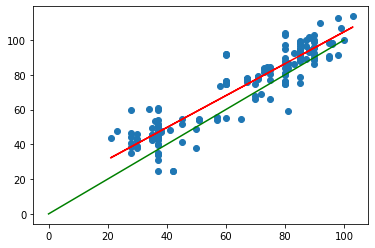

In [43]:
#look at the plot
ogt_plot(representative_archaea_predicted_ogt)

In [44]:
# get the correlation between predicted and actual ogt
representative_archaea_predicted_ogt.corr()["OGT"]

taxid                       -0.120289
species_taxid               -0.103982
genome_size                 -0.619238
genome_size_ungapped        -0.619238
gc_percent                  -0.090068
replicon_count              -0.282322
scaffold_count              -0.282322
contig_count                -0.228017
total_gene_count            -0.527103
protein_coding_gene_count   -0.538365
non_coding_gene_count       -0.131821
OGT                          1.000000
predicted_OGT                0.927209
Name: OGT, dtype: float64

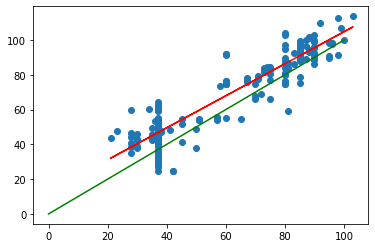

In [45]:
ogt_plot(full_archaea_predicted_ogt)

In [46]:
full_archaea_predicted_ogt.corr()["OGT"]

taxid                       -0.050235
species_taxid                0.002923
genome_size                 -0.602291
genome_size_ungapped        -0.602291
gc_percent                  -0.169264
replicon_count              -0.310458
scaffold_count              -0.310458
contig_count                -0.277091
total_gene_count            -0.522987
protein_coding_gene_count   -0.531849
non_coding_gene_count       -0.202525
OGT                          1.000000
predicted_OGT                0.932051
Name: OGT, dtype: float64

Analyse results

In [47]:
predicted_ogt_analysis(representative_archaea_predicted_ogt)

r2 score for perfect model is 0.7382935359470983
Mean Absolute Error: 9.63119170984456
Mean Square Error: 129.82658445595854
Root Mean Square Error: 11.394146938492524


In [48]:
predicted_ogt_analysis(full_archaea_predicted_ogt)

r2 score for perfect model is 0.7354466149193435
Mean Absolute Error: 9.944198473282443
Mean Square Error: 135.11737709923665
Root Mean Square Error: 11.624000047283063


Split into thermal groups

In [49]:
# split the representitive bact into its diff thermal types
psy_arch,meso_arch, therm_arch = explore_therm_types(representative_archaea_predicted_ogt)

analyse thermal groups

In [51]:
psy_arch.corr()["OGT"]

taxid                       NaN
species_taxid               NaN
genome_size                 NaN
genome_size_ungapped        NaN
gc_percent                  NaN
replicon_count              NaN
scaffold_count              NaN
contig_count                NaN
total_gene_count            NaN
protein_coding_gene_count   NaN
non_coding_gene_count       NaN
OGT                         NaN
predicted_OGT               NaN
Name: OGT, dtype: float64

No psychrophile correlation due to lack of psychrophiles

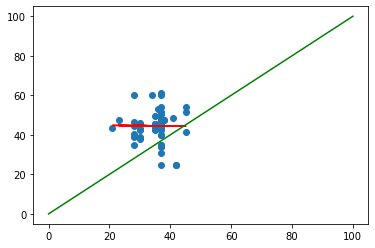

In [52]:
ogt_plot(meso_arch)

In [53]:
meso_arch.corr()["OGT"]

taxid                        0.081547
species_taxid                0.204725
genome_size                  0.068875
genome_size_ungapped         0.068875
gc_percent                   0.057108
replicon_count               0.142564
scaffold_count               0.142564
contig_count                 0.142564
total_gene_count             0.120032
protein_coding_gene_count    0.122857
non_coding_gene_count       -0.289708
OGT                          1.000000
predicted_OGT               -0.009068
Name: OGT, dtype: float64

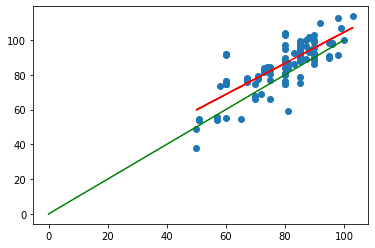

In [54]:
ogt_plot(therm_arch)

In [55]:
therm_arch.corr()["OGT"]

taxid                        0.161406
species_taxid                0.052868
genome_size                 -0.310080
genome_size_ungapped        -0.310080
gc_percent                   0.251770
replicon_count              -0.061720
scaffold_count              -0.061720
contig_count                -0.054416
total_gene_count            -0.166313
protein_coding_gene_count   -0.171307
non_coding_gene_count        0.205916
OGT                          1.000000
predicted_OGT                0.797371
Name: OGT, dtype: float64

### Prokaryotes

In [57]:
#import datasets
representative_prokaryote_predicted_ogt = pd.read_csv('representative_prokaryote_predicted_ogt.csv')
full_prokaryote_predicted_ogt = pd.read_csv('full_prokaryote_predicted_ogt.csv')

Or, alternatively

In [58]:
#create datasets
#state dataframes
dataframes_representative = [representative_bacteria_predicted_ogt, representative_archaea_predicted_ogt]
dataframes_full = [ full_bacteria_predicted_ogt, full_archaea_predicted_ogt]
# combine them
representative_prokaryote_predicted_ogt = pd.concat(dataframes_representative)
full_prokaryote_predicted_ogt = pd.concat(dataframes_full)

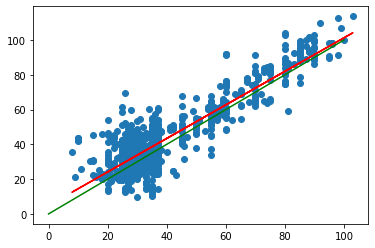

In [59]:
#look at the plot
ogt_plot(representative_prokaryote_predicted_ogt)

In [60]:
# get the correlation between predicted and actual ogt
representative_prokaryote_predicted_ogt.corr()["OGT"]

taxid                        0.105128
species_taxid                0.033423
OGT                          1.000000
predicted_OGT                0.874564
genome_size                 -0.619238
genome_size_ungapped        -0.619238
gc_percent                  -0.090068
replicon_count              -0.282322
scaffold_count              -0.282322
contig_count                -0.228017
total_gene_count            -0.527103
protein_coding_gene_count   -0.538365
non_coding_gene_count       -0.131821
Name: OGT, dtype: float64

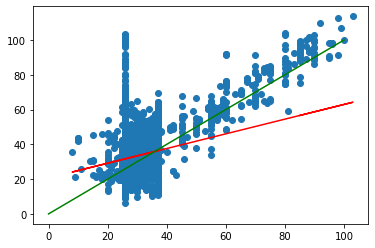

In [61]:
ogt_plot(full_prokaryote_predicted_ogt)

In [62]:
full_prokaryote_predicted_ogt.corr()["OGT"]

taxid                       -0.049475
species_taxid               -0.054679
OGT                          1.000000
predicted_OGT                0.302890
genome_size                 -0.602291
genome_size_ungapped        -0.602291
gc_percent                  -0.169264
replicon_count              -0.310458
scaffold_count              -0.310458
contig_count                -0.277091
total_gene_count            -0.522987
protein_coding_gene_count   -0.531849
non_coding_gene_count       -0.202525
Name: OGT, dtype: float64

Analyse results

In [63]:
predicted_ogt_analysis(representative_prokaryote_predicted_ogt)

r2 score for perfect model is 0.6585650004417737
Mean Absolute Error: 6.712895774647887
Mean Square Error: 79.26878969014085
Root Mean Square Error: 8.903302178974993


In [64]:
predicted_ogt_analysis(full_prokaryote_predicted_ogt)

r2 score for perfect model is -1.2830118002971278
Mean Absolute Error: 6.905411153616678
Mean Square Error: 87.40124463552452
Root Mean Square Error: 9.348863280395351


investigate different thermal adaptations

In [65]:
#split into thermal groups
psy_pro,meso_pro, therm_pro = explore_therm_types(representative_prokaryote_predicted_ogt)

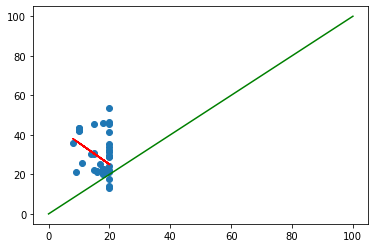

In [66]:
ogt_plot(psy_pro)

In [67]:
psy_pro.corr()["OGT"]

taxid                        0.347944
species_taxid                0.254481
OGT                          1.000000
predicted_OGT               -0.397164
genome_size                       NaN
genome_size_ungapped              NaN
gc_percent                        NaN
replicon_count                    NaN
scaffold_count                    NaN
contig_count                      NaN
total_gene_count                  NaN
protein_coding_gene_count         NaN
non_coding_gene_count             NaN
Name: OGT, dtype: float64

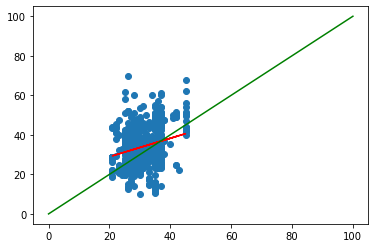

In [68]:
ogt_plot(meso_pro)

In [69]:
meso_pro.corr()["OGT"]

taxid                       -0.067619
species_taxid               -0.086584
OGT                          1.000000
predicted_OGT                0.275997
genome_size                  0.068875
genome_size_ungapped         0.068875
gc_percent                   0.057108
replicon_count               0.142564
scaffold_count               0.142564
contig_count                 0.142564
total_gene_count             0.120032
protein_coding_gene_count    0.122857
non_coding_gene_count       -0.289708
Name: OGT, dtype: float64

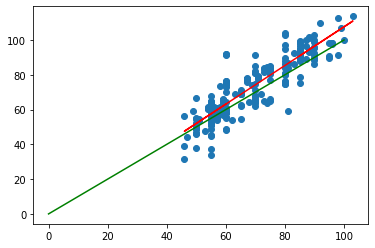

In [70]:
ogt_plot(therm_pro)

In [71]:
therm_pro.corr()["OGT"]

taxid                        0.129399
species_taxid                0.011108
OGT                          1.000000
predicted_OGT                0.889996
genome_size                 -0.310080
genome_size_ungapped        -0.310080
gc_percent                   0.251770
replicon_count              -0.061720
scaffold_count              -0.061720
contig_count                -0.054416
total_gene_count            -0.166313
protein_coding_gene_count   -0.171307
non_coding_gene_count        0.205916
Name: OGT, dtype: float64

# Amino Acid analysis

Is there a better amino acid fraction than IVYWREL?

get the amino acid fractions for each dataset using either amino_acid_calulator.py
- python amino_acid_calculator.py input_database.csv 
or amino_acid_and_met_thermometer.py 
- python amino_acid_and_met_thermometer.py dataset_name.csv

lets then calculate the ivywrel fractions for each dataset and investigate IVYWREL

following the investigation of IVYWREL, we can find the best correlated amino acid set for each dataset

In [72]:
def amino_acid_count(dataset):
    '''
    this function calculates the IVYWREL fraction for an input dataset
    
    Arguments:
        dataset(dataframe): the input dataframe of genomes.
    
    Returns:
        output(dataframe): the output dataframe of genomes, with calculated IVYWREL fractions
    '''
    output = dataset
    output["ivywrel_fraction"] = 0
    for item, name in dataset.iterrows():
        ivywrel_count = 0
        ivywrel = [ "I_fraction", "V_fraction", "Y_fraction", "W_fraction", "R_fraction", "E_fraction", "L_fraction"]
        #######
        for column in ivywrel:
            ivywrel_count = ivywrel_count + dataset.loc[item , column]
      
        output.loc[item, "ivywrel_fraction"] = ivywrel_count
    return output

In [74]:
#import amino acid fractions
#bact
representative_bacteria_amino_acids = pd.read_csv('representative_bacteria_amino_acids.csv')
full_bacteria_amino_acids = pd.read_csv('full_bacteria_amino_acids.csv')
#archaea
representative_archaea_amino_acids = pd.read_csv('representative_archaea_amino_acids.csv')
full_archaea_amino_acids = pd.read_csv('full_archaea_amino_acids.csv')
#prokaryote
representative_prokaryote_amino_acids = pd.read_csv('representative_prokaryote_amino_acids.csv')
full_prokaryote_amino_acids = pd.read_csv('full_prokaryote_amino_acids.csv')

C:\Users\yq19555\AppData\Local\Temp\ipykernel_20860\3854886860.py:10: DtypeWarning: Columns (3,16,23,24,31,32,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  full_prokaryote_amino_acids = pd.read_csv('full_prokaryote_amino_acids.csv')


In [75]:
## calculate ivywrel fractions
#bact
representative_bacteria_ivywrel = amino_acid_count(representative_bacteria_amino_acids)
full_bacteria_ivywrel = amino_acid_count(full_bacteria_amino_acids)
#archaea
representative_archaea_ivywrel = amino_acid_count(representative_archaea_amino_acids)
full_archaea_ivywrel = amino_acid_count(full_archaea_amino_acids)
#prokaryote
representative_prokaryote_ivywrel = amino_acid_count(representative_prokaryote_amino_acids)
full_prokaryote_ivywrel = amino_acid_count(full_prokaryote_amino_acids)

In [76]:
def amino_acid_analysis(dataset, acid_set):
    '''
    Analyses an amino acid fraction as a model for ogt prediction.
    splits the dataset into test and train datasets.
    
    Arguments:
        dataset(dataframe): the dataframe for analysis
        acid_set(string): the acid set for analysis - must be the column name as a string
    '''
    X = pd.DataFrame(dataset, columns=[acid_set])
    y= (dataset["OGT"])


    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
    from sklearn import linear_model
    regr = linear_model.LinearRegression()
    regr.fit(train_X, train_y)
    #Model Evaluation
    y_pred_regr= regr.predict(test_X)

    from sklearn import metrics
    meanAbErr = metrics.mean_absolute_error(test_y, y_pred_regr)
    meanSqErr = metrics.mean_squared_error(test_y, y_pred_regr)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test_y, y_pred_regr))
    print('R squared: {:.2f}'.format(regr.score(X,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)

In [77]:
def fraction_plot(data,sequence_fraction):
    '''
    Plots ogt against a stated amino acid fraction
    
    Arguments:
        data(dataframe): the dataset
        sequence_fraction(string): the pre-calculated amino acid set.
    '''
    #define data
    x = data["OGT"]
    y = data[sequence_fraction]

    #find line of best fit
    a, b = np.polyfit(x, y, 1)

    #add points to plot
    plt.scatter(x, y)
    #add line of best fit to plot
    plt.plot(x, a*x+b, "red")   
    ##add custom line to plot


### Bacteria ivywrel analysis

In [78]:
amino_acid_analysis(representative_bacteria_ivywrel,"ivywrel_fraction")

R squared: 47.27
Mean Absolute Error: 5.1070464706928425
Mean Square Error: 47.41606347489237
Root Mean Square Error: 6.885932287997927


In [81]:
#find the correlation
representative_bacteria_ivywrel.corr()["OGT"]

wgs_master               NaN
taxid               0.036918
species_taxid       0.019387
OGT                 1.000000
predicted_OGT       0.687815
I_fraction          0.141505
V_fraction          0.175591
Y_fraction          0.186666
W_fraction         -0.077661
R_fraction          0.066289
E_fraction          0.335283
L_fraction         -0.017215
A_fraction         -0.116154
N_fraction         -0.091098
D_fraction         -0.275403
C_fraction          0.023281
Q_fraction         -0.194110
G_fraction         -0.042321
H_fraction         -0.161543
K_fraction          0.131226
M_fraction          0.051771
F_fraction          0.064206
P_fraction         -0.023058
S_fraction         -0.393318
T_fraction         -0.363304
B_fraction               NaN
Z_fraction         -0.030444
O_fraction               NaN
U_fraction          0.079598
X_fraction         -0.021558
J_fraction         -0.030444
other_fraction           NaN
ivywrel_fraction    0.687810
Name: OGT, dtype: float64

In [82]:
#split into thermal groups
psy_bact_ivywrel,mesobact_ivywrel, thermbact_ivywrel = explore_therm_types(representative_bacteria_ivywrel)

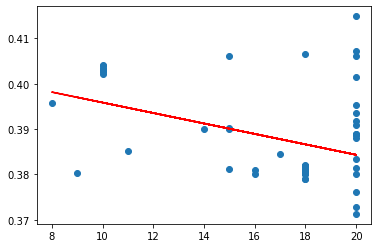

In [84]:
fraction_plot(psy_bact_ivywrel, "ivywrel_fraction")

In [85]:
psy_bact_ivywrel.corr()["OGT"]

wgs_master               NaN
taxid               0.347944
species_taxid       0.254481
OGT                 1.000000
predicted_OGT      -0.397164
I_fraction         -0.484090
V_fraction          0.096148
Y_fraction         -0.292824
W_fraction          0.543873
R_fraction          0.326572
E_fraction         -0.439355
L_fraction          0.307427
A_fraction          0.366268
N_fraction         -0.221543
D_fraction         -0.201214
C_fraction         -0.546572
Q_fraction          0.453018
G_fraction          0.174603
H_fraction          0.434726
K_fraction         -0.388907
M_fraction         -0.657869
F_fraction         -0.030559
P_fraction          0.503939
S_fraction         -0.334951
T_fraction          0.484295
B_fraction               NaN
Z_fraction               NaN
O_fraction               NaN
U_fraction         -0.316076
X_fraction               NaN
J_fraction               NaN
other_fraction           NaN
ivywrel_fraction   -0.397206
Name: OGT, dtype: float64

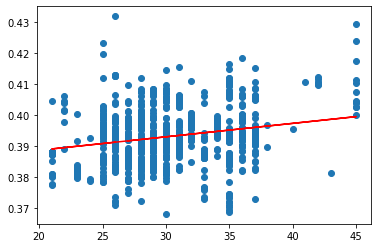

In [86]:
fraction_plot(mesobact_ivywrel, "ivywrel_fraction")

In [87]:
mesobact_ivywrel.corr()["OGT"]

wgs_master               NaN
taxid              -0.115091
species_taxid      -0.130626
OGT                 1.000000
predicted_OGT       0.245975
I_fraction          0.053687
V_fraction          0.020836
Y_fraction          0.048091
W_fraction          0.037604
R_fraction          0.001409
E_fraction          0.043239
L_fraction          0.047616
A_fraction         -0.026179
N_fraction         -0.018116
D_fraction         -0.212226
C_fraction          0.059537
Q_fraction          0.083538
G_fraction         -0.020909
H_fraction         -0.034889
K_fraction          0.023450
M_fraction          0.214442
F_fraction         -0.017561
P_fraction         -0.033865
S_fraction         -0.228199
T_fraction         -0.096400
B_fraction               NaN
Z_fraction         -0.058071
O_fraction               NaN
U_fraction          0.009548
X_fraction         -0.035901
J_fraction         -0.058071
other_fraction           NaN
ivywrel_fraction    0.245976
Name: OGT, dtype: float64

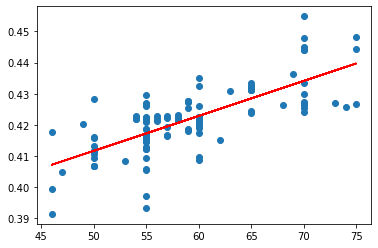

In [88]:
fraction_plot(thermbact_ivywrel, "ivywrel_fraction")

In [89]:
thermbact_ivywrel.corr()["OGT"]

wgs_master               NaN
taxid               0.229493
species_taxid       0.202153
OGT                 1.000000
predicted_OGT       0.729725
I_fraction          0.351754
V_fraction         -0.019137
Y_fraction          0.464638
W_fraction         -0.361497
R_fraction         -0.278545
E_fraction          0.578617
L_fraction          0.038666
A_fraction         -0.459500
N_fraction          0.222757
D_fraction         -0.178955
C_fraction          0.048133
Q_fraction         -0.502786
G_fraction         -0.305455
H_fraction         -0.554626
K_fraction          0.454687
M_fraction         -0.474620
F_fraction          0.477246
P_fraction         -0.280515
S_fraction          0.175134
T_fraction         -0.520552
B_fraction               NaN
Z_fraction               NaN
O_fraction               NaN
U_fraction          0.111151
X_fraction         -0.079600
J_fraction               NaN
other_fraction           NaN
ivywrel_fraction    0.729726
Name: OGT, dtype: float64

In [90]:
# have a little look at the full dataset
amino_acid_analysis(full_bacteria_ivywrel,"ivywrel_fraction")

R squared: 1.11
Mean Absolute Error: 4.667861612289644
Mean Square Error: 26.718610303845235
Root Mean Square Error: 5.169004769183835


### Archaea IVYWREL analysis

In [91]:
amino_acid_analysis(representative_archaea_ivywrel,"ivywrel_fraction")

R squared: 85.92
Mean Absolute Error: 6.718668783232099
Mean Square Error: 80.69812290637581
Root Mean Square Error: 8.983213395348894


In [92]:
#find the correlation
representative_archaea_ivywrel.corr()["OGT"]

taxid                       -0.120289
species_taxid               -0.103982
genome_size                 -0.619238
genome_size_ungapped        -0.619238
gc_percent                  -0.090068
replicon_count              -0.282322
scaffold_count              -0.282322
contig_count                -0.228017
total_gene_count            -0.527103
protein_coding_gene_count   -0.538365
non_coding_gene_count       -0.131821
OGT                          1.000000
predicted_OGT                0.927209
I_fraction                   0.167622
V_fraction                   0.401273
Y_fraction                   0.546108
W_fraction                   0.498295
R_fraction                   0.298213
E_fraction                   0.167634
L_fraction                   0.760584
A_fraction                  -0.189723
N_fraction                  -0.212868
D_fraction                  -0.661726
C_fraction                  -0.481078
Q_fraction                  -0.742091
G_fraction                  -0.209968
H_fraction  

In [93]:
#split into thermal groups
psyarch_ivywrel,mesoarch_ivywrel, thermarch_ivywrel = explore_therm_types(representative_archaea_ivywrel)

No Psychrophilic archaea

In [98]:
psyarch_ivywrel.corr()["OGT"]

taxid                       NaN
species_taxid               NaN
genome_size                 NaN
genome_size_ungapped        NaN
gc_percent                  NaN
replicon_count              NaN
scaffold_count              NaN
contig_count                NaN
total_gene_count            NaN
protein_coding_gene_count   NaN
non_coding_gene_count       NaN
OGT                         NaN
predicted_OGT               NaN
I_fraction                  NaN
V_fraction                  NaN
Y_fraction                  NaN
W_fraction                  NaN
R_fraction                  NaN
E_fraction                  NaN
L_fraction                  NaN
A_fraction                  NaN
N_fraction                  NaN
D_fraction                  NaN
C_fraction                  NaN
Q_fraction                  NaN
G_fraction                  NaN
H_fraction                  NaN
K_fraction                  NaN
M_fraction                  NaN
F_fraction                  NaN
P_fraction                  NaN
S_fracti

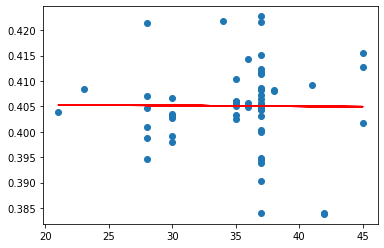

In [99]:
fraction_plot(mesoarch_ivywrel, "ivywrel_fraction")

In [100]:
mesoarch_ivywrel.corr()["OGT"]

taxid                        0.081547
species_taxid                0.204725
genome_size                  0.068875
genome_size_ungapped         0.068875
gc_percent                   0.057108
replicon_count               0.142564
scaffold_count               0.142564
contig_count                 0.142564
total_gene_count             0.120032
protein_coding_gene_count    0.122857
non_coding_gene_count       -0.289708
OGT                          1.000000
predicted_OGT               -0.009068
I_fraction                  -0.109067
V_fraction                   0.039942
Y_fraction                   0.048066
W_fraction                   0.061995
R_fraction                   0.062862
E_fraction                   0.102563
L_fraction                  -0.069790
A_fraction                   0.092677
N_fraction                  -0.023425
D_fraction                   0.090598
C_fraction                  -0.193404
Q_fraction                   0.023563
G_fraction                  -0.023068
H_fraction  

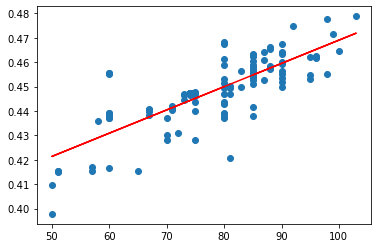

In [101]:
fraction_plot(thermarch_ivywrel, "ivywrel_fraction")

In [102]:
thermarch_ivywrel.corr()["OGT"]

taxid                        0.161406
species_taxid                0.052868
genome_size                 -0.310080
genome_size_ungapped        -0.310080
gc_percent                   0.251770
replicon_count              -0.061720
scaffold_count              -0.061720
contig_count                -0.054416
total_gene_count            -0.166313
protein_coding_gene_count   -0.171307
non_coding_gene_count        0.205916
OGT                          1.000000
predicted_OGT                0.797371
I_fraction                  -0.257563
V_fraction                   0.500190
Y_fraction                   0.039396
W_fraction                   0.600381
R_fraction                   0.327144
E_fraction                   0.245689
L_fraction                   0.524636
A_fraction                   0.347743
N_fraction                  -0.440378
D_fraction                  -0.615549
C_fraction                  -0.155815
Q_fraction                  -0.484501
G_fraction                   0.100518
H_fraction  

In [103]:
# look at full
amino_acid_analysis(full_archaea_ivywrel,"ivywrel_fraction")

R squared: 86.84
Mean Absolute Error: 7.4576381216863
Mean Square Error: 95.61136556163764
Root Mean Square Error: 9.778106440494378


### Prokaryote IVYWREL analysis

In [104]:
amino_acid_analysis(representative_prokaryote_ivywrel,"ivywrel_fraction")

R squared: 76.48
Mean Absolute Error: 5.477154329917615
Mean Square Error: 50.38360074487541
Root Mean Square Error: 7.0981406540639504


In [106]:
#find the correlation
representative_prokaryote_ivywrel.corr()["OGT"]

taxid                        0.105128
species_taxid                0.033423
genome_size                 -0.619238
genome_size_ungapped        -0.619238
gc_percent                  -0.090068
replicon_count              -0.282322
scaffold_count              -0.282322
contig_count                -0.228017
total_gene_count            -0.527103
protein_coding_gene_count   -0.538365
non_coding_gene_count       -0.131821
OGT                          1.000000
predicted_OGT                0.874564
I_fraction                   0.279040
V_fraction                   0.397065
Y_fraction                   0.407406
W_fraction                  -0.134191
R_fraction                   0.106818
E_fraction                   0.488864
L_fraction                  -0.008960
A_fraction                  -0.250314
N_fraction                  -0.100148
D_fraction                  -0.326035
C_fraction                  -0.124237
Q_fraction                  -0.550507
G_fraction                  -0.028942
H_fraction  

In [107]:
#split into thermal groups
psypro_ivywrel,mesopro_ivywrel, thermpro_ivywrel = explore_therm_types(representative_prokaryote_ivywrel)

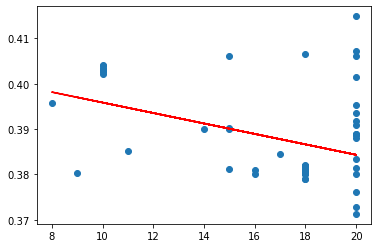

In [108]:
fraction_plot(psypro_ivywrel, "ivywrel_fraction")

In [109]:
psypro_ivywrel.corr()["OGT"]

taxid                        0.347944
species_taxid                0.254481
genome_size                       NaN
genome_size_ungapped              NaN
gc_percent                        NaN
replicon_count                    NaN
scaffold_count                    NaN
contig_count                      NaN
total_gene_count                  NaN
protein_coding_gene_count         NaN
non_coding_gene_count             NaN
OGT                          1.000000
predicted_OGT               -0.397164
I_fraction                  -0.484090
V_fraction                   0.096148
Y_fraction                  -0.292824
W_fraction                   0.543873
R_fraction                   0.326572
E_fraction                  -0.439355
L_fraction                   0.307427
A_fraction                   0.366268
N_fraction                  -0.221543
D_fraction                  -0.201214
C_fraction                  -0.546572
Q_fraction                   0.453018
G_fraction                   0.174603
H_fraction  

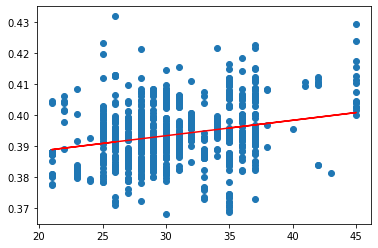

In [110]:
fraction_plot(mesopro_ivywrel, "ivywrel_fraction")

In [111]:
mesopro_ivywrel.corr()["OGT"]

taxid                       -0.067619
species_taxid               -0.086584
genome_size                  0.068875
genome_size_ungapped         0.068875
gc_percent                   0.057108
replicon_count               0.142564
scaffold_count               0.142564
contig_count                 0.142564
total_gene_count             0.120032
protein_coding_gene_count    0.122857
non_coding_gene_count       -0.289708
OGT                          1.000000
predicted_OGT                0.275997
I_fraction                   0.064683
V_fraction                   0.049946
Y_fraction                   0.064325
W_fraction                  -0.008897
R_fraction                  -0.002217
E_fraction                   0.107005
L_fraction                  -0.025425
A_fraction                  -0.042100
N_fraction                  -0.014745
D_fraction                  -0.058553
C_fraction                   0.079581
Q_fraction                  -0.006079
G_fraction                  -0.007409
H_fraction  

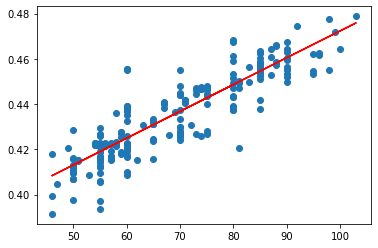

In [112]:
fraction_plot(thermpro_ivywrel, "ivywrel_fraction")

In [113]:
thermpro_ivywrel.corr()["OGT"]

taxid                        0.129399
species_taxid                0.011108
genome_size                 -0.310080
genome_size_ungapped        -0.310080
gc_percent                   0.251770
replicon_count              -0.061720
scaffold_count              -0.061720
contig_count                -0.054416
total_gene_count            -0.166313
protein_coding_gene_count   -0.171307
non_coding_gene_count        0.205916
OGT                          1.000000
predicted_OGT                0.889996
I_fraction                   0.113826
V_fraction                   0.514151
Y_fraction                   0.414336
W_fraction                   0.102770
R_fraction                   0.133518
E_fraction                   0.400849
L_fraction                   0.329925
A_fraction                  -0.184285
N_fraction                  -0.172673
D_fraction                  -0.446258
C_fraction                  -0.263094
Q_fraction                  -0.728176
G_fraction                   0.069226
H_fraction  

In [114]:
# look at full dataset
amino_acid_analysis(full_prokaryote_ivywrel,"ivywrel_fraction")

R squared: 9.15
Mean Absolute Error: 4.846916722287002
Mean Square Error: 35.780258701020756
Root Mean Square Error: 5.981660196050989


## Finding the best correlating amino acid sets for our datasets
We've analysed how good IVYWREL is as a fraction for predicting otg

is there a better fraction?

are these fractions different between domains?


Use the code find_best_correlation.py to find the best correlating amino acid set for each dataset.
- python find_best_correlation.py input_dataset.csv

The code will produce two csv files containing the ten strongest positive and negative correlating amino acid sets. We will be using the positive csv file "best_positive_corrs.csv". Within this file contains the strongest positive correlating amino acid set

# Bacterial set - IVYWRELMFP
the best fraction for representative Bacteria was IVYWRELMFP. lets analyse that. Use the amino acid count datasets mentioned earlier.
The best fraction for the full dataset was  IVWREACQKMS

In [115]:
def amino_acid_count_IVYWRELMFP(dataset):
    '''
     this function calculates the IVYWRELMFP fraction for an input dataset
    
    Arguments:
        dataset(dataframe): the input dataframe of genomes.
    
    Returns:
        output(dataframe): the output dataframe of genomes, with calculated IVYWRELMFP fractions
    '''
    output = dataset
    output["ivywrelmfp_fraction"] = 0
    
    for item, name in dataset.iterrows():
        ivywrelmfp = [ "I_fraction", "V_fraction", "Y_fraction", "W_fraction", "R_fraction", "E_fraction", "L_fraction","M_fraction", "F_fraction", "P_fraction"]
        #######
        ivywrelmfp_count = 0
        for column in ivywrelmfp:
            ivywrelmfp_count = ivywrelmfp_count + dataset.loc[item , column]
        
        output.loc[item, "ivywrelmfp_fraction"] = ivywrelmfp_count
    return output

In [116]:
# calculate IVYWRELMFP fractions
representative_bacterial_ivywrelmfp_dataset = amino_acid_count_IVYWRELMFP(representative_bacteria_ivywrel)

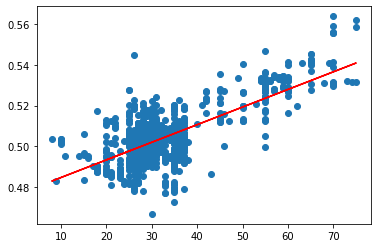

In [117]:
fraction_plot(representative_bacterial_ivywrelmfp_dataset, "ivywrelmfp_fraction")

In [119]:
#make sure corr is right
representative_bacterial_ivywrelmfp_dataset.corr()["OGT"]

wgs_master                  NaN
taxid                  0.036918
species_taxid          0.019387
OGT                    1.000000
predicted_OGT          0.687815
I_fraction             0.141505
V_fraction             0.175591
Y_fraction             0.186666
W_fraction            -0.077661
R_fraction             0.066289
E_fraction             0.335283
L_fraction            -0.017215
A_fraction            -0.116154
N_fraction            -0.091098
D_fraction            -0.275403
C_fraction             0.023281
Q_fraction            -0.194110
G_fraction            -0.042321
H_fraction            -0.161543
K_fraction             0.131226
M_fraction             0.051771
F_fraction             0.064206
P_fraction            -0.023058
S_fraction            -0.393318
T_fraction            -0.363304
B_fraction                  NaN
Z_fraction            -0.030444
O_fraction                  NaN
U_fraction             0.079598
X_fraction            -0.021558
J_fraction            -0.030444
other_fr

In [120]:
# analyse the fraction
amino_acid_analysis(representative_bacterial_ivywrelmfp_dataset, "ivywrelmfp_fraction")

R squared: 47.92
Mean Absolute Error: 5.026255996960007
Mean Square Error: 45.554266210331036
Root Mean Square Error: 6.7493900620968


Look at the thermal differences

In [121]:
psy_bact_ivywrelmfp,mesobact_ivywrelmfp, thermbact_ivywrelmfp = explore_therm_types(representative_bacterial_ivywrelmfp_dataset)

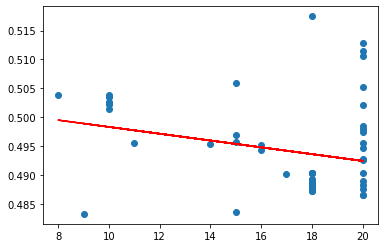

In [122]:
fraction_plot(psy_bact_ivywrelmfp, "ivywrelmfp_fraction")

In [123]:
psy_bact_ivywrelmfp.corr()["OGT"]

wgs_master                  NaN
taxid                  0.347944
species_taxid          0.254481
OGT                    1.000000
predicted_OGT         -0.397164
I_fraction            -0.484090
V_fraction             0.096148
Y_fraction            -0.292824
W_fraction             0.543873
R_fraction             0.326572
E_fraction            -0.439355
L_fraction             0.307427
A_fraction             0.366268
N_fraction            -0.221543
D_fraction            -0.201214
C_fraction            -0.546572
Q_fraction             0.453018
G_fraction             0.174603
H_fraction             0.434726
K_fraction            -0.388907
M_fraction            -0.657869
F_fraction            -0.030559
P_fraction             0.503939
S_fraction            -0.334951
T_fraction             0.484295
B_fraction                  NaN
Z_fraction                  NaN
O_fraction                  NaN
U_fraction            -0.316076
X_fraction                  NaN
J_fraction                  NaN
other_fr

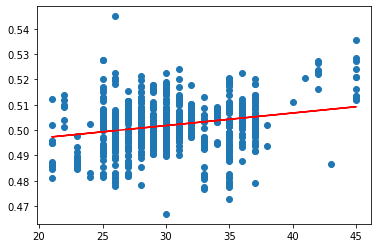

In [124]:
fraction_plot(mesobact_ivywrelmfp, "ivywrelmfp_fraction")

In [125]:
mesobact_ivywrelmfp.corr()["OGT"]

wgs_master                  NaN
taxid                 -0.115091
species_taxid         -0.130626
OGT                    1.000000
predicted_OGT          0.245975
I_fraction             0.053687
V_fraction             0.020836
Y_fraction             0.048091
W_fraction             0.037604
R_fraction             0.001409
E_fraction             0.043239
L_fraction             0.047616
A_fraction            -0.026179
N_fraction            -0.018116
D_fraction            -0.212226
C_fraction             0.059537
Q_fraction             0.083538
G_fraction            -0.020909
H_fraction            -0.034889
K_fraction             0.023450
M_fraction             0.214442
F_fraction            -0.017561
P_fraction            -0.033865
S_fraction            -0.228199
T_fraction            -0.096400
B_fraction                  NaN
Z_fraction            -0.058071
O_fraction                  NaN
U_fraction             0.009548
X_fraction            -0.035901
J_fraction            -0.058071
other_fr

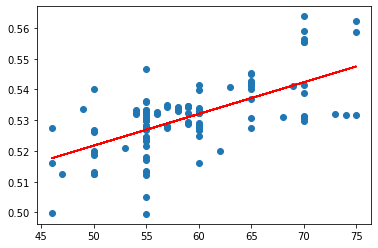

In [126]:
fraction_plot(thermbact_ivywrelmfp, "ivywrelmfp_fraction")

In [127]:
thermbact_ivywrelmfp.corr()["OGT"]

wgs_master                  NaN
taxid                  0.229493
species_taxid          0.202153
OGT                    1.000000
predicted_OGT          0.729725
I_fraction             0.351754
V_fraction            -0.019137
Y_fraction             0.464638
W_fraction            -0.361497
R_fraction            -0.278545
E_fraction             0.578617
L_fraction             0.038666
A_fraction            -0.459500
N_fraction             0.222757
D_fraction            -0.178955
C_fraction             0.048133
Q_fraction            -0.502786
G_fraction            -0.305455
H_fraction            -0.554626
K_fraction             0.454687
M_fraction            -0.474620
F_fraction             0.477246
P_fraction            -0.280515
S_fraction             0.175134
T_fraction            -0.520552
B_fraction                  NaN
Z_fraction                  NaN
O_fraction                  NaN
U_fraction             0.111151
X_fraction            -0.079600
J_fraction                  NaN
other_fr

Find the equation for predicting OGT using this fraction

In [128]:
def equation_finder(data, fraction):
    '''
     Plots ogt against a stated amino acid fraction. Gives an equation for predicting x (OGT) from y (fraction)
    
    Arguments:
        data(dataframe): the dataset
        sequence_fraction(string): the pre-calculated amino acid set.
    Returns:
        Nothing
    '''
    #define data
    x = data["OGT"] 
    y = data[fraction]

    #find line of best fit
    a, b = np.polyfit(x, y, 1)
    print(f"equation is {1/a} {fraction} - {b/a}")

In [129]:
equation_finder(representative_bacterial_ivywrelmfp_dataset, "ivywrelmfp_fraction")

equation is 1157.731909107249 ivywrelmfp_fraction - 551.2210260837379


## Archaeal dataset -IVYWRELAHKS


In [130]:
def amino_acid_count_IVYWRELAHKS(dataset):
    '''
     this function calculates the IVYWRELAHKS fraction for an input dataset
    
    Arguments:
        dataset(dataframe): the input dataframe of genomes.
    
    Returns:
        output(dataframe): the output dataframe of genomes, with calculated IVYWRELAHKS fractions
    '''
    output = dataset
    output["ivywrelakhs_fraction"] = 0
    for item, name in dataset.iterrows():
        IVYWRELAHKS = [ "I_fraction", "V_fraction", "Y_fraction", "W_fraction", "R_fraction", "E_fraction", "L_fraction","A_fraction", "H_fraction", "K_fraction", "S_fraction"]
        #######
        ivywrelakhs_count = 0
        for column in IVYWRELAHKS:
            ivywrelakhs_count = ivywrelakhs_count + dataset.loc[item , column]
        
        output.loc[item, "ivywrelakhs_fraction"] = ivywrelakhs_count
    return output

In [133]:
representative_archaeal_ivywrelahks_dataset = amino_acid_count_IVYWRELAHKS(representative_archaea_ivywrel)

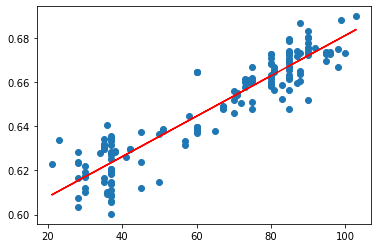

In [134]:
fraction_plot(representative_archaeal_ivywrelahks_dataset,"ivywrelakhs_fraction")

In [136]:
representative_archaeal_ivywrelahks_dataset.corr()["OGT"]

taxid                       -0.120289
species_taxid               -0.103982
genome_size                 -0.619238
genome_size_ungapped        -0.619238
gc_percent                  -0.090068
replicon_count              -0.282322
scaffold_count              -0.282322
contig_count                -0.228017
total_gene_count            -0.527103
protein_coding_gene_count   -0.538365
non_coding_gene_count       -0.131821
OGT                          1.000000
predicted_OGT                0.927209
I_fraction                   0.167622
V_fraction                   0.401273
Y_fraction                   0.546108
W_fraction                   0.498295
R_fraction                   0.298213
E_fraction                   0.167634
L_fraction                   0.760584
A_fraction                  -0.189723
N_fraction                  -0.212868
D_fraction                  -0.661726
C_fraction                  -0.481078
Q_fraction                  -0.742091
G_fraction                  -0.209968
H_fraction  

In [137]:
amino_acid_analysis(representative_archaeal_ivywrelahks_dataset, "ivywrelakhs_fraction")

R squared: 86.03
Mean Absolute Error: 6.013007400276497
Mean Square Error: 62.200278928188204
Root Mean Square Error: 7.886715344691236


In [138]:
# analyse thermal differences
psyarch_ivywrelakhs,mesoarch_ivywrelakhs, thermarch_ivywrelakhs = explore_therm_types(representative_archaeal_ivywrelahks_dataset)

Can't look at psychrophiles - no data for it

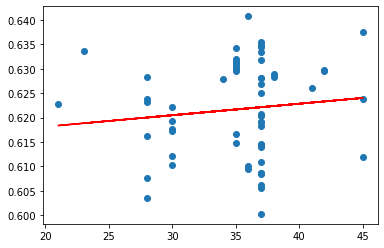

In [139]:
fraction_plot(mesoarch_ivywrelakhs,"ivywrelakhs_fraction")

In [141]:
mesoarch_ivywrelakhs.corr()["OGT"]

taxid                        0.081547
species_taxid                0.204725
genome_size                  0.068875
genome_size_ungapped         0.068875
gc_percent                   0.057108
replicon_count               0.142564
scaffold_count               0.142564
contig_count                 0.142564
total_gene_count             0.120032
protein_coding_gene_count    0.122857
non_coding_gene_count       -0.289708
OGT                          1.000000
predicted_OGT               -0.009068
I_fraction                  -0.109067
V_fraction                   0.039942
Y_fraction                   0.048066
W_fraction                   0.061995
R_fraction                   0.062862
E_fraction                   0.102563
L_fraction                  -0.069790
A_fraction                   0.092677
N_fraction                  -0.023425
D_fraction                   0.090598
C_fraction                  -0.193404
Q_fraction                   0.023563
G_fraction                  -0.023068
H_fraction  

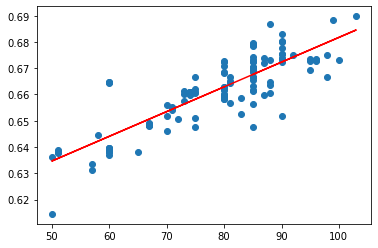

In [142]:
fraction_plot(thermarch_ivywrelakhs,"ivywrelakhs_fraction")

In [144]:
thermarch_ivywrelakhs.corr()["OGT"]

taxid                        0.161406
species_taxid                0.052868
genome_size                 -0.310080
genome_size_ungapped        -0.310080
gc_percent                   0.251770
replicon_count              -0.061720
scaffold_count              -0.061720
contig_count                -0.054416
total_gene_count            -0.166313
protein_coding_gene_count   -0.171307
non_coding_gene_count        0.205916
OGT                          1.000000
predicted_OGT                0.797371
I_fraction                  -0.257563
V_fraction                   0.500190
Y_fraction                   0.039396
W_fraction                   0.600381
R_fraction                   0.327144
E_fraction                   0.245689
L_fraction                   0.524636
A_fraction                   0.347743
N_fraction                  -0.440378
D_fraction                  -0.615549
C_fraction                  -0.155815
Q_fraction                  -0.484501
G_fraction                   0.100518
H_fraction  

In [145]:
# find the equation for predicting ogt using this fraction
equation_finder(representative_archaeal_ivywrelahks_dataset, "ivywrelakhs_fraction")

equation is 1095.5594856211576 ivywrelakhs_fraction - 646.113122548808


## Prokaryotic dataset - IVYWREL

We analysed the IVYWREL Fraction earlier in the section 'IVYWREL analysis'. There is no need to repeat these steps now. All thats needed is to find the equation

In [146]:
equation_finder(representative_prokaryote_ivywrel, "ivywrel_fraction")

equation is 971.5408553809118 ivywrel_fraction - 352.35067905279544


In [ ]:
p,m